<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,posix [darwin]
Python,"3.9.6 (default, Jun 29 2021, 05:25:02) [Clang 12.0.5 (clang-1205.0.22.9)]"
IPython,7.26.0
MatPlotLib,3.4.2
Numpy,1.21.1
pyAgrum,0.21.0.9


# Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))
cn

(gum::credal::CredalNet<double>@0x7fae28569a00) 
A:Range([0,1])
<> : [[0.0535077 , 0.946492] , [0.124851 , 0.875149]]

B:Range([0,2])
<A:0> : [[0.45521 , 0.454696 , 0.0900936] , [0.45521 , 0.480438 , 0.0643516] , [0.48095 , 0.480438 , 0.0386119] , [0.506692 , 0.454696 , 0.0386119] , [0.48095 , 0.428957 , 0.0900936] , [0.506692 , 0.428957 , 0.064351]]
<A:1> : [[0.138062 , 0.209644 , 0.652294] , [0.138062 , 0.235387 , 0.626551] , [0.163801 , 0.235387 , 0.600812] , [0.189542 , 0.209646 , 0.600812] , [0.163803 , 0.183904 , 0.652294] , [0.189542 , 0.183904 , 0.626554]]

C:Range([0,1])
<B:0|D:0> : [[0.640981 , 0.359019] , [0.686106 , 0.313894]]
<B:1|D:0> : [[0.10885 , 0.89115] , [0.153976 , 0.846024]]
<B:2|D:0> : [[0.921029 , 0.0789707] , [0.966156 , 0.0338437]]
<B:0|D:1> : [[0.0971403 , 0.90286] , [0.142266 , 0.857734]]
<B:1|D:1> : [[0.645517 , 0.354483] , [0.690642 , 0.309358]]
<B:2|D:1> : [[0.199648 , 0.800352] , [0.244772 , 0.755228]]

D:Range([0,1])
<A:0> : [[0.604444 , 0.395556] , [0.830476 , 0.169524]]
<A:1> : [[0.448343 , 0.551657] , [0.674374 , 0.325626]]

E:Range([0,1])
<A:0> : [[0.554377 , 0.445623] , [0.809019 , 0.190981]]
<A:1> : [[0.37223 , 0.62777] , [0.626874 , 0.373126]]

F:Range([0,1])
<E:0> : [[0.165091 , 0.834909] , [0.385214 , 0.614786]]
<E:1> : [[0.389183 , 0.610817] , [0.609306 , 0.390694]]

#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.sideBySide(cn,cn2)

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),
               gnb.getInference(cn2,engine=ie2_mc),
               gnb.getInference(cn2,engine=ie2_lbp))

In [7]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"))
gnb.sideBySide(ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"))
print(cn)


A:Range([0,1])
<> : [[0.0535077 , 0.946492] , [0.124851 , 0.875149]]

B:Range([0,2])
<A:0> : [[0.45521 , 0.454696 , 0.0900936] , [0.45521 , 0.480438 , 0.0643516] , [0.48095 , 0.480438 , 0.0386119] , [0.506692 , 0.454696 , 0.0386119] , [0.48095 , 0.428957 , 0.0900936] , [0.506692 , 0.428957 , 0.064351]]
<A:1> : [[0.138062 , 0.209644 , 0.652294] , [0.138062 , 0.235387 , 0.626551] , [0.163801 , 0.235387 , 0.600812] , [0.189542 , 0.209646 , 0.600812] , [0.163803 , 0.183904 , 0.652294] , [0.189542 , 0.183904 , 0.626554]]

C:Range([0,1])
<B:0|D:0> : [[0.640981 , 0.359019] , [0.686106 , 0.313894]]
<B:1|D:0> : [[0.10885 , 0.89115] , [0.153976 , 0.846024]]
<B:2|D:0> : [[0.921029 , 0.0789707] , [0.966156 , 0.0338437]]
<B:0|D:1> : [[0.0971403 , 0.90286] , [0.142266 , 0.857734]]
<B:1|D:1> : [[0.645517 , 0.354483] , [0.690642 , 0.309358]]
<B:2|D:1> : [[0.199648 , 0.800352] , [0.244772 , 0.755228]]

D:Range([0,1])
<A:0> : [[0.604444 , 0.395556] , [0.830476 , 0.169524]]
<A:1> : [[0.448343 , 0.551657

## Credal Net from bif files

In [8]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

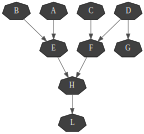

In [9]:
gnb.showCN(cn,"2")

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
gnb.sideBySide(cn,gnb.getInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]}))

# Comparing inference in credal networks

In [13]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

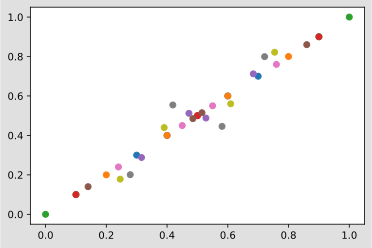

In [14]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

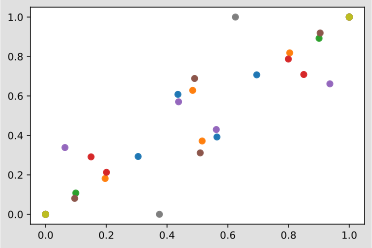

In [15]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [16]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [17]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [18]:
print(ie.dynamicExpMax("temp"))

(14.203404648293022, 11.817699847864338, 12.0406461626149, 12.023367090540296, 12.00214897282622, 12.008870898650432, 12.007624551734526, 12.007682925808101, 12.007727248106775)


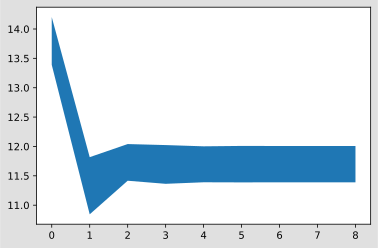

In [19]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [20]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


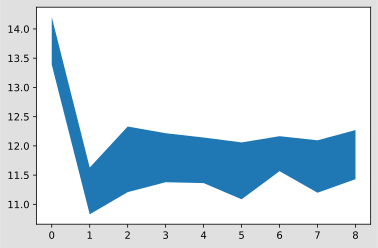

In [21]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

stopped with epsilon=0


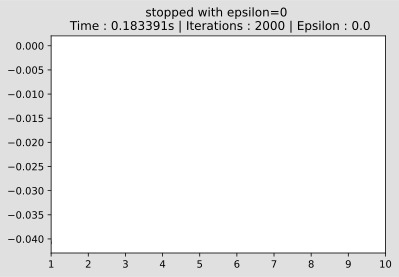

In [22]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()
print(ie.messageApproximationScheme())

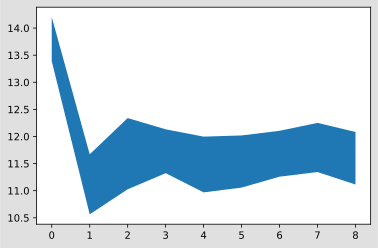

In [23]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));